In [1]:
import numpy as np
import xtrack as xt
import xobjects as xo
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt

/home/pkruyt/cernbox/xsuite-env/xtrack/xtrack/progress_indicator.py:95: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
#lattice parameters for ELENA at 100 keV
# from https://acc-models.web.cern.ch/acc-models/elena/scenarios/highenergy/highenergy.tfs
qx = 2.36168984503
qy = 1.38992572490
circumference = 30.40531277976 #m

# relativistic factors
gamma_rel = 1.0001066 # at 100 keV

# optics at e-cooler (approximate), in m
beta_x = 1.7
beta_y = 2.7
D_x = 1

# electron cooler parameters
current = 0.001 # A current
length = 1 # m cooler length
radius_e_beam = 25*1e-3 #m radius of the electron beam
temp_perp = 100e-3 # <E> [eV] = kb*T
temp_long =  1e-3 # <E> [eV]
magnetic_field = 0.010 # 100 Gauss in ELENA
# idea is to study magnetic field imperfections
magnetic_field_ratio_list = [0,5e-4,1e-3,5e-3] #Iterate over different values of the magnetic field quality to see effect on cooling performance.
#magnetic_field_ratio is the ratio of transverse componenet of magnetic field and the longitudinal component. In the ideal case, the ratio is 0.

# some initial beam parameters
emittance = 5e-6
dp_p = 2e-3 

# simulation parameters: simulate 10 s of cooling, and take data once every 10 ms
max_time_s = 10
int_time_s = 0.01

In [3]:
# some constants, and simple computations
clight = 299792458.0
mass0 = 938.27208816*1e6 #ev/c^2

beta_rel = np.sqrt(gamma_rel**2 - 1)/gamma_rel
p0c = mass0*beta_rel*gamma_rel #eV/c
T_per_turn = circumference/(clight*beta_rel)

# compute length of simulation, as well as sample interval, in turns
num_turns = int(max_time_s/T_per_turn)
save_interval = int(int_time_s/T_per_turn)

# compute initial beam parameters
x_init = np.sqrt(beta_x*emittance)
y_init = np.sqrt(beta_y*emittance)

  0%|          | 0/10 [00:00<?, ?it/s]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 10%|█         | 1/10 [01:18<11:46, 78.55s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 20%|██        | 2/10 [02:34<10:14, 76.76s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 30%|███       | 3/10 [03:49<08:51, 75.99s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 40%|████      | 4/10 [05:01<07:28, 74.75s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 50%|█████     | 5/10 [06:17<06:14, 74.90s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 60%|██████    | 6/10 [07:32<05:00, 75.14s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 70%|███████   | 7/10 [08:46<03:44, 74.84s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 80%|████████  | 8/10 [10:03<02:30, 75.35s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


 90%|█████████ | 9/10 [11:18<01:15, 75.39s/it]

Compiling ContextCpu kernels...


No longitudinal focusing found in the line. Assuming coasting beam uniformly distributed along the line - EXPERIMENTAL!


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


EXPERIMENTAL FEATURE: coasting beam.


Done compiling ContextCpu kernels.


100%|██████████| 10/10 [12:34<00:00, 75.43s/it]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


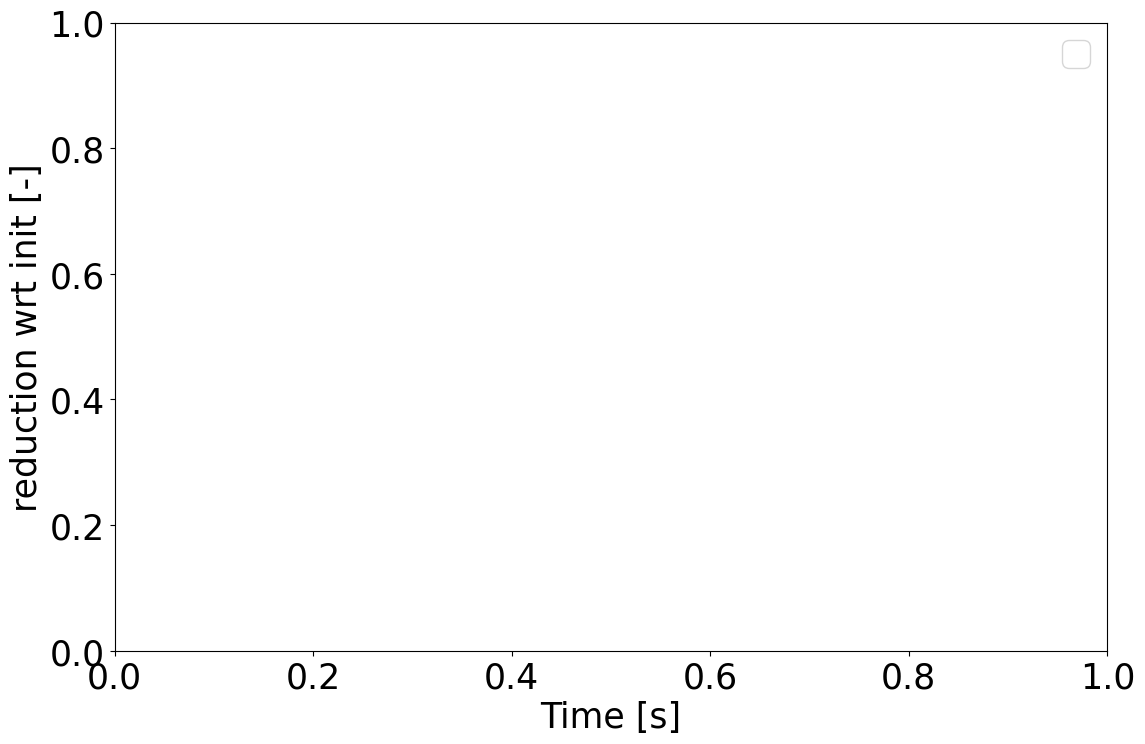

In [4]:
from tqdm import tqdm

n_part = 1000

angle_list=np.linspace(-4e-3,4e-3,10)
# angle_list=np.linspace(-40e-3,40e-3,50)

final_emittance_x=[]
final_emittance_x_normalised=[]
sigma_x_list=[]

final_emittance_y=[]
final_emittance_y_normalised=[]
sigma_y_list=[]

# simulation parameters: simulate 10 s of cooling, and take data once every 10 ms
max_time_s = 2.4
int_time_s = 0.01

# compute length of simulation, as well as sample interval, in turns
num_turns = int(max_time_s/T_per_turn)
save_interval = int(int_time_s/T_per_turn)


#plot some overall values
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
for angle in tqdm(angle_list):
        # Define the whole machine
        arc = xt.LineSegmentMap(
                qx=qx, qy=qx,
                dqx=0, dqy=0,
                length=circumference,
                betx=beta_x,
                bety=beta_y,
                dx=D_x)

        electron_cooler = xt.ElectronCooler(
                length=length,
                radius_e_beam=radius_e_beam,
                current=current,
                temp_perp=temp_perp,
                temp_long=temp_long,
                magnetic_field=magnetic_field, 
                magnetic_field_ratio=1e-3,
                offset_px=angle,
                space_charge=0)

        # create a monitor object, to reduce holded data
        monitor = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=1,
                                n_repetitions=int(num_turns/save_interval),
                                repetition_period=save_interval,
                                num_particles=n_part)

        line = xt.Line(
                elements=[monitor, electron_cooler, arc])
        line.particle_ref = xp.Particles(mass0=mass0, q0=1, p0c=p0c)
        line.build_tracker()

        # create desired beam
        bunch_intensity = None
        beta_gamma = line.particle_ref._beta0*line.particle_ref._gamma0
        gemitt_x = 10e-6
        gemitt_y = 5e-6
        nemitt_x = gemitt_x*beta_gamma
        nemitt_y = gemitt_y*beta_gamma
        sigma_dp = 1e-3
        particles = xp.generate_matched_gaussian_bunch(
                num_particles=n_part, total_intensity_particles=bunch_intensity,
                nemitt_x=nemitt_x, nemitt_y=nemitt_y, sigma_dp=sigma_dp,
                coasting=True,
                line=line)

        # just track all particles, and keep turn-by-turn data (memory expensive!)
        line.track(particles, num_turns=num_turns,
                turn_by_turn_monitor=False)

        # extract relevant values
        x = monitor.x[:,:,0]
        px = monitor.px[:,:,0]
        y = monitor.y[:,:,0]
        py = monitor.py[:,:,0]
        delta = monitor.delta[:,:,0]
        time = monitor.at_turn[:, 0, 0] * T_per_turn

        # compute actions. for x, remove the dp/p contribution:
        action_x = ((x-D_x*delta)**2/beta_x + beta_x*px**2)
        # for y, simple compute:
        action_y = (y**2/beta_y + beta_y*py**2)

        emittance_x_normalised=np.mean(action_x, axis=1)/gemitt_x/2
        emittance_x=np.mean(action_x, axis=1)
        sigma_x=np.std(x*1e3, axis=1)
        
        emittance_y_normalised=np.mean(action_y, axis=1)/gemitt_y/2
        emittance_y=np.mean(action_y, axis=1)
        sigma_y=np.std(y*1e3, axis=1)
        

        #plt.plot(time, np.std(delta, axis=1)/sigma_dp, label=f'RMS dp/p (init={sigma_dp})')

        #(WARNING! FACTOR 2 TO BE UNDERSTOOD!)
        #plt.plot(time, np.mean(action_x, axis=1)/gemitt_x/2, label=f'RMS $\epsilon_x$ (init={gemitt_x})')
        #plt.plot(time, np.mean(action_y, axis=1)/gemitt_y/2, label=f'RMS $\epsilon_y$ (init={gemitt_y})')

        #plt.plot(time,emittance_x , label=r'$\theta$='f'{angle}')

        final_emittance_x_normalised.append(emittance_x_normalised[-1])       
        final_emittance_x.append(emittance_x[-1])
        sigma_x_list.append(sigma_x[-1])

        final_emittance_y_normalised.append(emittance_y_normalised[-1])       
        final_emittance_y.append(emittance_y[-1])
        sigma_y_list.append(sigma_y[-1])
                #final_emittance_y.append(np.mean(action_y, axis=1)/gemitt_y/2)

# sigma_x_list = [float(value) * 1e3 for value in sigma_x_list]
# sigma_y_list = [float(value) * 1e3 for value in sigma_y_list]


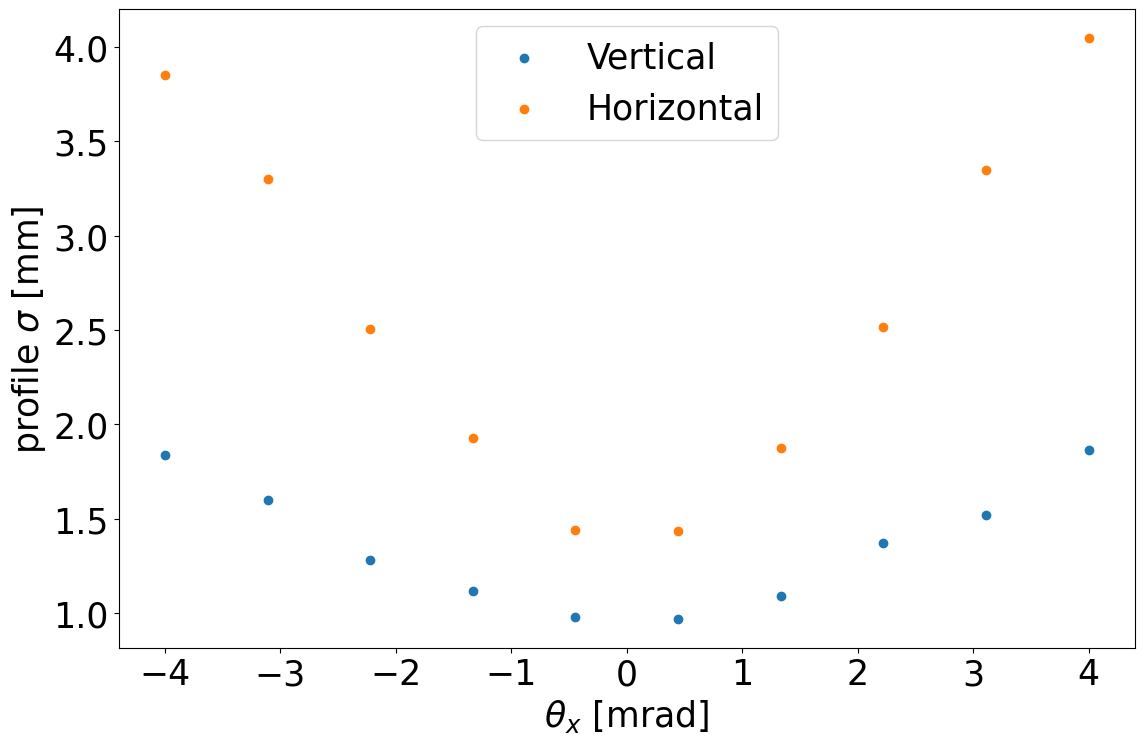

In [6]:
# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})
# plt.plot(angle_list,final_emittance_x_normalised)
# plt.xlabel(r'$\theta$')
# plt.ylabel('final emittance')
# plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
# plt.tight_layout()
# plt.show()


plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(angle_list*1e3,sigma_y_list,label='Vertical')
plt.scatter(angle_list*1e3,sigma_x_list,label='Horizontal')
plt.xlabel(r'$\theta_x$ [mrad]')
plt.ylabel(r'profile $\sigma$ [mm]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.legend()
plt.tight_layout()
plt.savefig('H_angle_Xsuite.png', format='png', dpi=300)
plt.show()


